In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
import requests as re
import csv

### Goal for the next day is to load all the csvs for google trends and the prices for each coin.
### All the CSVs have been downloaded and are saved on the data file.  
### Goal for 6/11/2022 - 
     1. Load the google trend CSVs into a DF.  Add a new column that identifies the type of coin for the information being  represented.
     2. Merge the DFs into one and export this into a new CSV.
         2a. This is how you'll save the new CSV after merging them all together:
             googlebitcoin.to_csv(r'../data/testing.csv')

### Note - When combining the DFs, you have to do  Cardano, USD_Coin, and Shiba_inu separately.  These CSVs are showing a weekly trend amount.  You're going to have to create a DF for these, then do an average per month.  When you do that, you can then merge it to the main DF.

### Creating the first DF to test out how it'll look.

In [211]:
##Creating the first dataframe for google trending data for the keyword Bitcoin
googlebitcoin = pd.read_csv('../data/2017-2022-bitcoin.csv')
print(googlebitcoin.shape)
googlebitcoin.head(10) 

(67, 2)


,Category: All categories,Unnamed: 1
0,NaN,NaN
1,Month,bitcoin: (Worldwide)
2,2017-01,6
3,2017-02,6
4,2017-03,7
5,2017-04,6
6,2017-05,15
7,2017-06,14
8,2017-07,13
9,2017-08,20


In [212]:
##lets rename the second column to mention the Trend.
header_row = googlebitcoin.iloc[1]
googlebitcoin = pd.DataFrame(googlebitcoin.values[2:], columns=header_row)
googlebitcoin.head()

1,Month,bitcoin: (Worldwide)
0,2017-01,6
1,2017-02,6
2,2017-03,7
3,2017-04,6
4,2017-05,15


In [213]:
googlebitcoin1 = googlebitcoin.rename(columns={'bitcoin: (Worldwide)':'Trend_Count'})

In [214]:
#creating a new column that'll have the coin name abbreviation.
googlebitcoin1['CoinName'] = 'Bitcoin'
googlebitcoin1['CoinAbbrev'] = 'BTC'

In [215]:
googlebitcoin1

1,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01,6,Bitcoin,BTC
1,2017-02,6,Bitcoin,BTC
2,2017-03,7,Bitcoin,BTC
3,2017-04,6,Bitcoin,BTC
4,2017-05,15,Bitcoin,BTC
...,...,...,...,...
60,2022-01,38,Bitcoin,BTC
61,2022-02,34,Bitcoin,BTC
62,2022-03,29,Bitcoin,BTC
63,2022-04,23,Bitcoin,BTC


In [216]:
googlebitcoin1['Month'] = pd.to_datetime(googlebitcoin1['Month'])

In [217]:
googlebitcoin1.dtypes

1
Month          datetime64[ns]
Trend_Count            object
CoinName               object
CoinAbbrev             object
dtype: object

In [218]:
googlebitcoin1['Trend_Count'] = pd.to_numeric(googlebitcoin1['Trend_Count'])

In [219]:
googlebitcoin1

1,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,6,Bitcoin,BTC
1,2017-02-01,6,Bitcoin,BTC
2,2017-03-01,7,Bitcoin,BTC
3,2017-04-01,6,Bitcoin,BTC
4,2017-05-01,15,Bitcoin,BTC
...,...,...,...,...
60,2022-01-01,38,Bitcoin,BTC
61,2022-02-01,34,Bitcoin,BTC
62,2022-03-01,29,Bitcoin,BTC
63,2022-04-01,23,Bitcoin,BTC


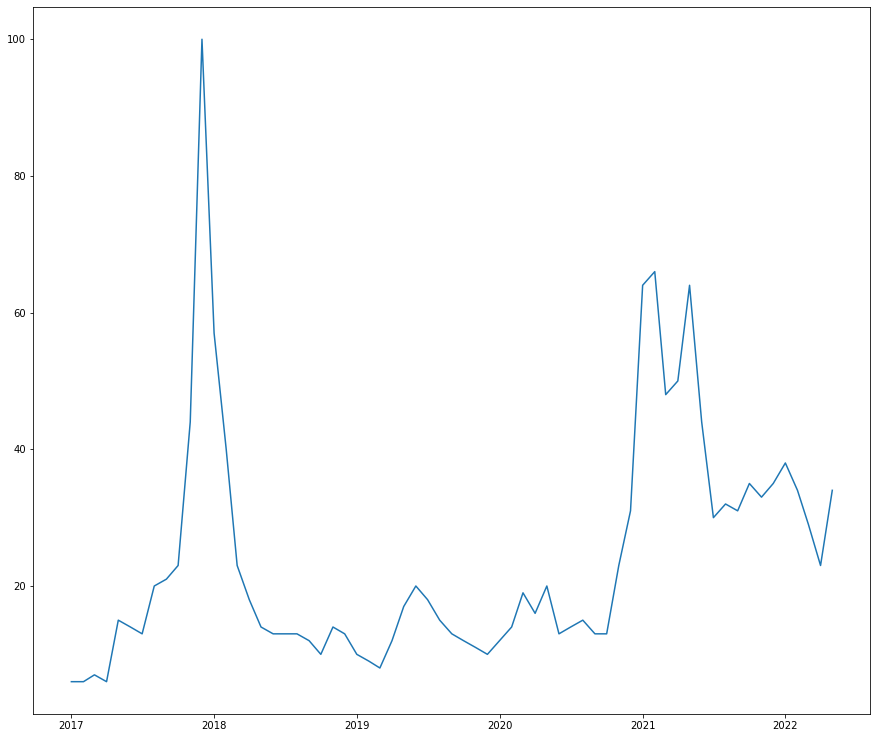

In [308]:
x =googlebitcoin1['Month']
y = googlebitcoin1['Trend_Count']

plt.figure(figsize=(15,13))
plt.plot(x, y)
plt.show()

### Loading in the other CSVs in.   

### dont forget to also change the header rows to 1,2,3 etc - did that
### go back and look at the abbreviations again

In [292]:
#dogecoin
googledogecoin = pd.read_csv('../data/2017-2022-dogecoin.csv')
print(googledogecoin.shape)
googledogecoin.head(10) 

(67, 2)


,Category: All categories,Unnamed: 1
0,NaN,NaN
1,Month,DOGECOIN: (Worldwide)
2,2017-01,0
3,2017-02,0
4,2017-03,0
5,2017-04,0
6,2017-05,1
7,2017-06,1
8,2017-07,1
9,2017-08,1


In [293]:
header_row = googledogecoin.iloc[1]
googledogecoin = pd.DataFrame(googledogecoin.values[2:], columns=header_row)

In [294]:
googledogecoin1 = googledogecoin.rename(columns={'DOGECOIN: (Worldwide)':'Trend_Count'})

In [295]:
googledogecoin1['CoinName'] = 'Dogecoin'
googledogecoin1['CoinAbbrev'] = 'DOGE'

In [296]:
googledogecoin1

1,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01,0,Dogecoin,DOGE
1,2017-02,0,Dogecoin,DOGE
2,2017-03,0,Dogecoin,DOGE
3,2017-04,0,Dogecoin,DOGE
4,2017-05,1,Dogecoin,DOGE
...,...,...,...,...
60,2022-01,10,Dogecoin,DOGE
61,2022-02,6,Dogecoin,DOGE
62,2022-03,5,Dogecoin,DOGE
63,2022-04,6,Dogecoin,DOGE


In [297]:
googledogecoin1['Month'] = pd.to_datetime(googledogecoin1['Month'])
googledogecoin1['Trend_Count'] = pd.to_numeric(googledogecoin1['Trend_Count'])

In [298]:
googledogecoin1

1,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,0,Dogecoin,DOGE
1,2017-02-01,0,Dogecoin,DOGE
2,2017-03-01,0,Dogecoin,DOGE
3,2017-04-01,0,Dogecoin,DOGE
4,2017-05-01,1,Dogecoin,DOGE
...,...,...,...,...
60,2022-01-01,10,Dogecoin,DOGE
61,2022-02-01,6,Dogecoin,DOGE
62,2022-03-01,5,Dogecoin,DOGE
63,2022-04-01,6,Dogecoin,DOGE


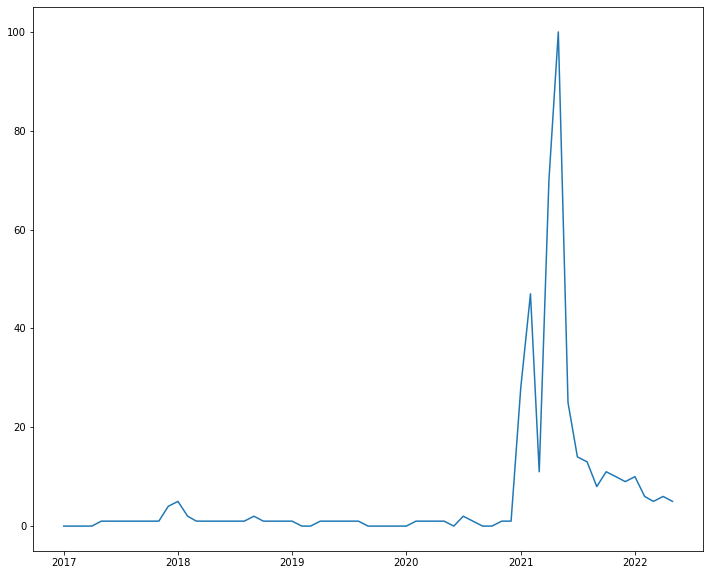

In [300]:
x =googledogecoin1['Month']
y = googledogecoin1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [313]:
#ethereum - I started having a problem with the rows I wanted to remove from the CSV were not replicated throughout the spreadsheets that I had.  I used the skiprows function to remove those two rows.
googleethereum = pd.read_csv('../data/2017-2022-ethereum.csv', skiprows=2)
print(googleethereum.shape)
googleethereum.head(10) 

(65, 2)


,Month,ethereum: (Worldwide)
0,2017-01,1
1,2017-02,1
2,2017-03,5
3,2017-04,4
4,2017-05,14
5,2017-06,30
6,2017-07,18
7,2017-08,16
8,2017-09,14
9,2017-10,12


In [314]:
#Here again, had a problem with renaming.  I had to rename the df so the rename would take.
googleethereum1 = googleethereum.rename(columns={'ethereum: (Worldwide)':'Trend_Count'})

In [315]:
googleethereum1['CoinName'] = 'Ethereum'
googleethereum1['CoinAbbrev'] = 'ETH'

In [316]:
googleethereum1['Month'] = pd.to_datetime(googleethereum1['Month'])
googleethereum1['Trend_Count'] = pd.to_numeric(googleethereum1['Trend_Count'])

In [317]:
googleethereum1

,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,1,Ethereum,ETH
1,2017-02-01,1,Ethereum,ETH
2,2017-03-01,5,Ethereum,ETH
3,2017-04-01,4,Ethereum,ETH
4,2017-05-01,14,Ethereum,ETH
...,...,...,...,...
60,2022-01-01,41,Ethereum,ETH
61,2022-02-01,34,Ethereum,ETH
62,2022-03-01,27,Ethereum,ETH
63,2022-04-01,23,Ethereum,ETH


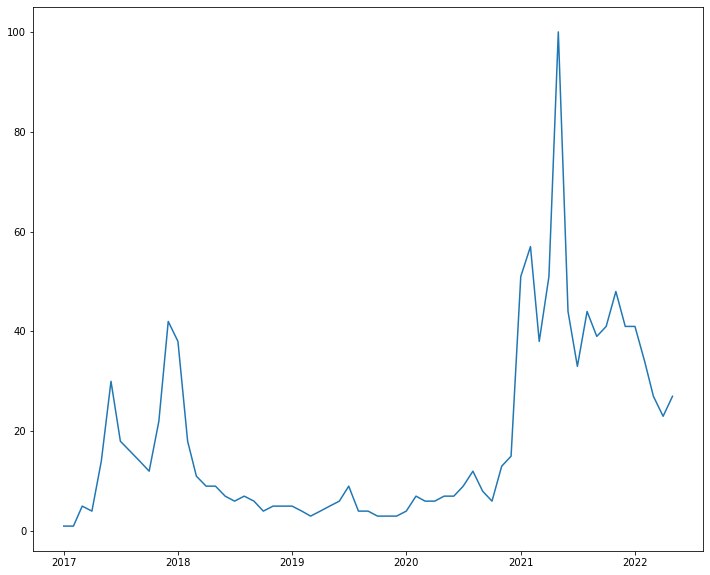

In [318]:
x =googleethereum1['Month']
y = googleethereum1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [236]:
#solana
googlesolana = pd.read_csv('../data/2017-2022-solana.csv', skiprows=2)
print(googlesolana.shape)
googlesolana.head(10) 

(65, 2)


,Month,solana: (Worldwide)
0,2017-01,11
1,2017-02,11
2,2017-03,11
3,2017-04,11
4,2017-05,11
5,2017-06,11
6,2017-07,12
7,2017-08,11
8,2017-09,10
9,2017-10,10


In [237]:
googlesolana1 = googlesolana.rename(columns={'solana: (Worldwide)':'Trend_Count'})

In [238]:
googlesolana1['CoinName'] = 'Solana'
googlesolana1['CoinAbbrev'] = 'SOL'

In [319]:
googlesolana1['Month'] = pd.to_datetime(googlesolana1['Month'])
googlesolana1['Trend_Count'] = pd.to_numeric(googlesolana1['Trend_Count'])

In [320]:
googlesolana1

,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,11,Solana,SOL
1,2017-02-01,11,Solana,SOL
2,2017-03-01,11,Solana,SOL
3,2017-04-01,11,Solana,SOL
4,2017-05-01,11,Solana,SOL
...,...,...,...,...
60,2022-01-01,83,Solana,SOL
61,2022-02-01,65,Solana,SOL
62,2022-03-01,51,Solana,SOL
63,2022-04-01,59,Solana,SOL


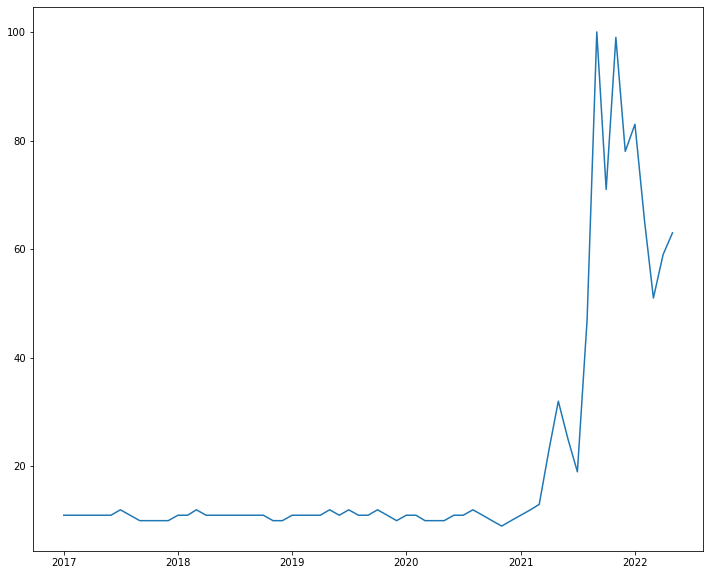

In [321]:
x =googlesolana1['Month']
y = googlesolana1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [240]:
#stellar
googlestellar = pd.read_csv('../data/2017-2022-stellar.csv', skiprows=2)

In [241]:
googlestellar1 = googlestellar.rename(columns={'stellar: (Worldwide)':'Trend_Count'})

In [242]:
googlestellar1['CoinName'] = 'Stellar'
googlestellar1['CoinAbbrev'] = 'XLM'

In [322]:
googlestellar1['Month'] = pd.to_datetime(googlestellar1['Month'])
googlestellar1['Trend_Count'] = pd.to_numeric(googlestellar1['Trend_Count'])

In [323]:
googlestellar1

,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,23,Stellar,XLM
1,2017-02-01,22,Stellar,XLM
2,2017-03-01,25,Stellar,XLM
3,2017-04-01,28,Stellar,XLM
4,2017-05-01,28,Stellar,XLM
...,...,...,...,...
60,2022-01-01,31,Stellar,XLM
61,2022-02-01,29,Stellar,XLM
62,2022-03-01,30,Stellar,XLM
63,2022-04-01,30,Stellar,XLM


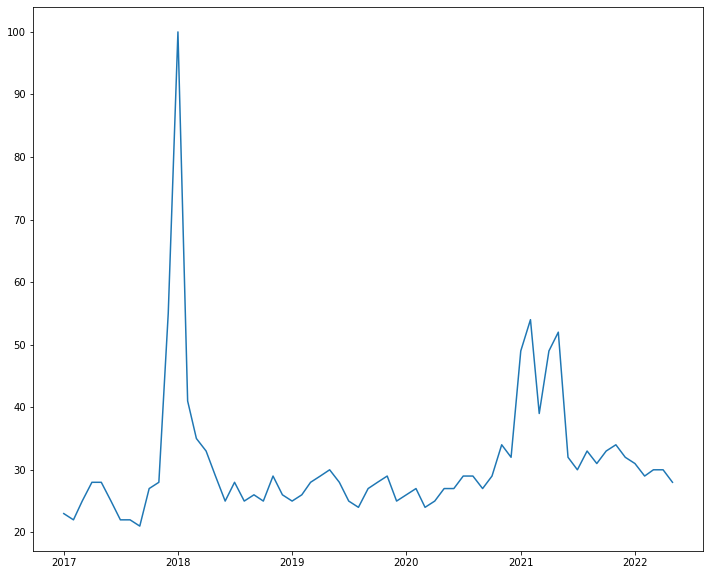

In [324]:
x =googlestellar1['Month']
y = googlestellar1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [325]:
#tether
googletether = pd.read_csv('../data/2017-2022-tether.csv', skiprows=2)

In [326]:
googletether1 = googletether.rename(columns={'Tether: (Worldwide)':'Trend_Count'})

In [327]:
googletether1['CoinName'] = 'Tether'
googletether1['CoinAbbrev'] = 'USDT'

In [328]:
googletether1

,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01,5,Tether,USDT
1,2017-02,5,Tether,USDT
2,2017-03,5,Tether,USDT
3,2017-04,6,Tether,USDT
4,2017-05,6,Tether,USDT
...,...,...,...,...
61,2022-02,63,Tether,USDT
62,2022-03,65,Tether,USDT
63,2022-04,68,Tether,USDT
64,2022-05,95,Tether,USDT


In [329]:
googletether1['Month'] = pd.to_datetime(googletether1['Month'])
googletether1['Trend_Count'] = pd.to_numeric(googletether1['Trend_Count'])

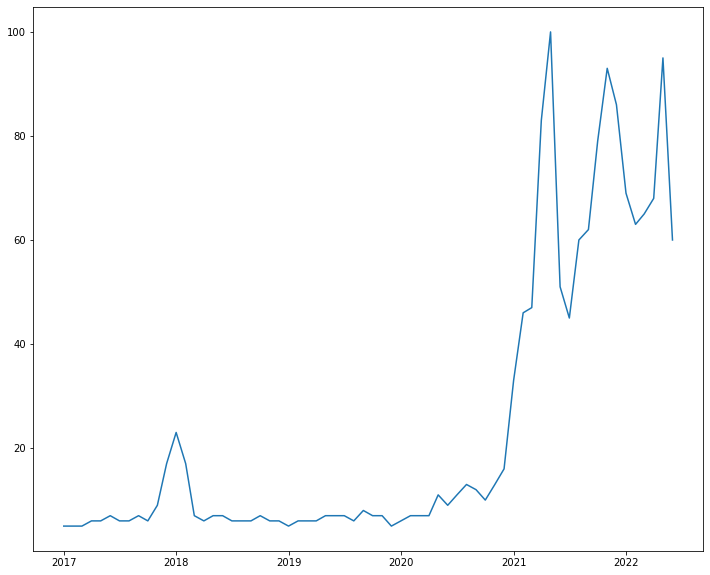

In [330]:
x =googletether1['Month']
y = googletether1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [335]:
#xrp
googlexrp = pd.read_csv('../data/2017-2022-XRP.csv', skiprows=2)

In [336]:
googlexrp1 = googlexrp.rename(columns={'XRP: (Worldwide)':'Trend_Count'})

In [337]:
googlexrp1['CoinName'] = 'XRP'
googlexrp1['CoinAbbrev'] = 'XRP'

In [338]:
googlexrp1

,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01,0,XRP,XRP
1,2017-02,0,XRP,XRP
2,2017-03,1,XRP,XRP
3,2017-04,1,XRP,XRP
4,2017-05,5,XRP,XRP
...,...,...,...,...
60,2022-01,22,XRP,XRP
61,2022-02,23,XRP,XRP
62,2022-03,22,XRP,XRP
63,2022-04,18,XRP,XRP


In [339]:
googlexrp1['Month'] = pd.to_datetime(googlexrp1['Month'])
googlexrp1['Trend_Count'] = pd.to_numeric(googlexrp1['Trend_Count'])


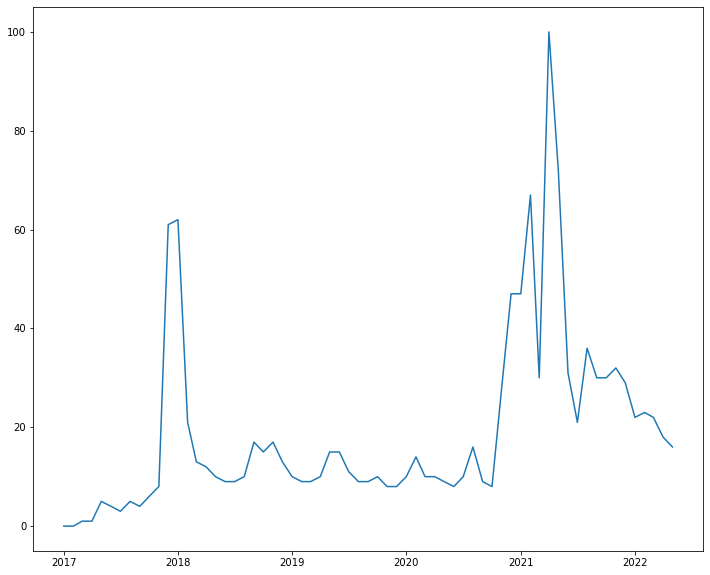

In [340]:
x =googlexrp1['Month']
y = googlexrp1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [341]:
#cardano - Remember, Cardano runs off weekly trend count.  We're going to get the average amount per month for weekly results DFs.
googlecardano = pd.read_csv('../data/2018-2022-cardano.csv', skiprows=2)

In [342]:
googlecardano1 = googlecardano.rename(columns={'cardano: (Worldwide)':'Trend_Count'})

In [343]:
googlecardano1['CoinName'] = 'Cardano'
googlecardano1['CoinAbbrev'] = 'ada'

In [344]:
googlecardano1

,Week,Trend_Count,CoinName,CoinAbbrev
0,2018-09-23,3,Cardano,ada
1,2018-09-30,3,Cardano,ada
2,2018-10-07,3,Cardano,ada
3,2018-10-14,3,Cardano,ada
4,2018-10-21,3,Cardano,ada
...,...,...,...,...
188,2022-05-01,14,Cardano,ada
189,2022-05-08,19,Cardano,ada
190,2022-05-15,15,Cardano,ada
191,2022-05-22,13,Cardano,ada


In [346]:
googlecardano1['Week'] = pd.to_datetime(googlecardano1['Week'])
googlecardano1['Trend_Count'] = pd.to_numeric(googlecardano1['Trend_Count'])

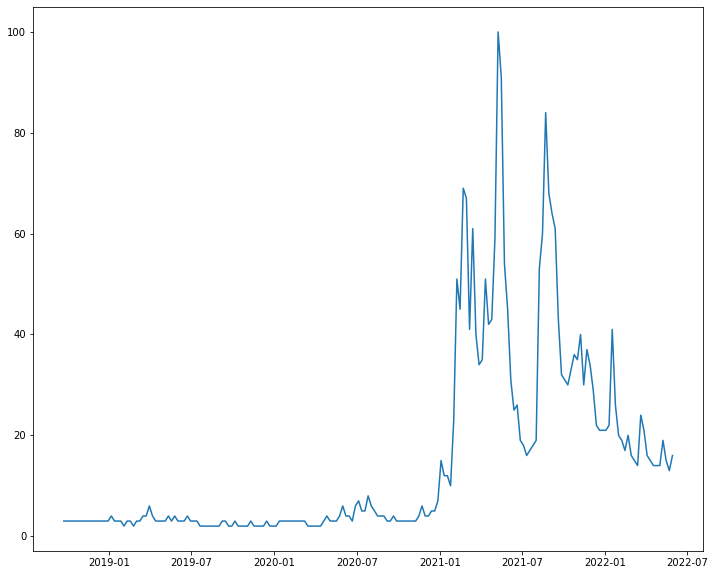

In [348]:
x =googlecardano1['Week']
y = googlecardano1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [349]:
#usd coin - Weekly results.  We're going to need to average this df too.
googleusdcoin = pd.read_csv('../data/2018-2022-usd_coin.csv', skiprows=2)

In [350]:
googleusdcoin1 = googleusdcoin.rename(columns={'USD COIN: (Worldwide)':'Trend_Count'})

In [351]:
googleusdcoin1['CoinName'] = 'USD Coin'
googleusdcoin1['CoinAbbrev'] = 'USDC'

In [352]:
googleusdcoin1['Week'] = pd.to_datetime(googleusdcoin1['Week'])
googleusdcoin1['Trend_Count'] = pd.to_numeric(googleusdcoin1['Trend_Count'])

In [353]:
googleusdcoin1

,Week,Trend_Count,CoinName,CoinAbbrev
0,2018-10-07,7,USD Coin,USDC
1,2018-10-14,8,USD Coin,USDC
2,2018-10-21,9,USD Coin,USDC
3,2018-10-28,7,USD Coin,USDC
4,2018-11-04,7,USD Coin,USDC
...,...,...,...,...
186,2022-05-01,26,USD Coin,USDC
187,2022-05-08,65,USD Coin,USDC
188,2022-05-15,38,USD Coin,USDC
189,2022-05-22,27,USD Coin,USDC


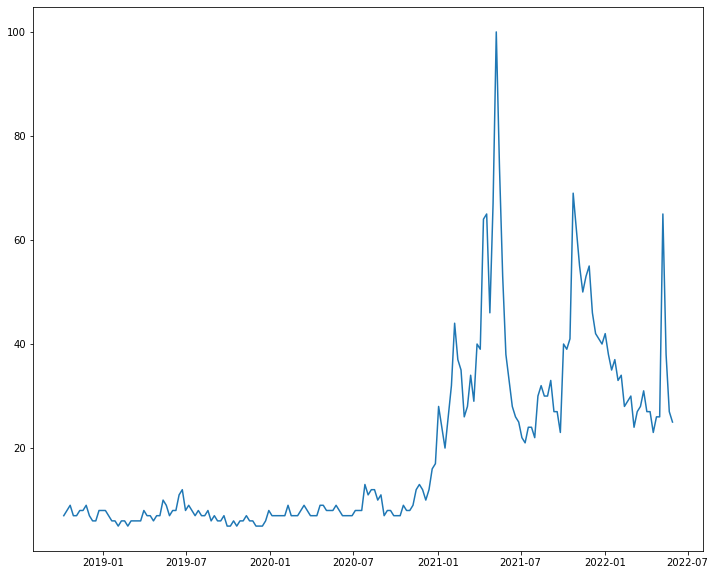

In [354]:
x =googleusdcoin1['Week']
y = googleusdcoin1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [355]:
#shiba inu - weekly results
googleshibainu = pd.read_csv('../data/2020-2022-shiba_inu.csv', skiprows=2)

In [356]:
googleshibainu1 = googleshibainu.rename(columns={'Shiba Inu: (Worldwide)':'Trend_Count'})

In [357]:
googleshibainu1['CoinName'] = 'Shiba Inu'
googleshibainu1['CoinAbbrev'] = 'SHIB'

In [358]:
googleshibainu1['Week'] = pd.to_datetime(googleshibainu1['Week'])
googleshibainu1['Trend_Count'] = pd.to_numeric(googleshibainu1['Trend_Count'])

In [359]:
googleshibainu1

,Week,Trend_Count,CoinName,CoinAbbrev
0,2020-08-02,2,Shiba Inu,SHIB
1,2020-08-09,2,Shiba Inu,SHIB
2,2020-08-16,3,Shiba Inu,SHIB
3,2020-08-23,3,Shiba Inu,SHIB
4,2020-08-30,2,Shiba Inu,SHIB
...,...,...,...,...
91,2022-05-01,6,Shiba Inu,SHIB
92,2022-05-08,8,Shiba Inu,SHIB
93,2022-05-15,5,Shiba Inu,SHIB
94,2022-05-22,5,Shiba Inu,SHIB


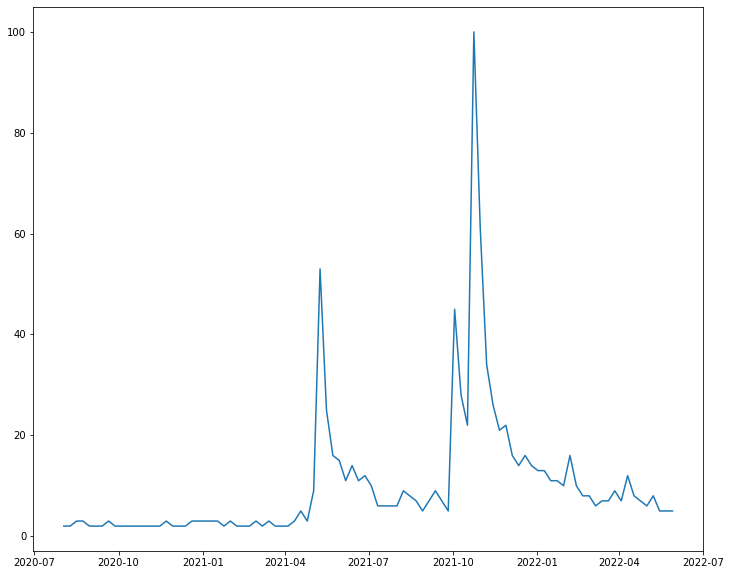

In [360]:
x =googleshibainu1['Week']
y = googleshibainu1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

### I've saved the Google Trend DFs:
googlebitcoin1
googledogecoin1
googleethereum1
googlesolana1
googlestellar1
googletether1
googlexrp1

New DF with all the above combined: MontlyGoogleTrends
IMPORTANT Note:  We're likely not going to be using them merged together.  Visualize them separately here in Python. Price information is where you're going to visualize in PowerBi.

### The DFs below are in a weekly format.  We need to fix this before merging them with the ones above.
googlecardano1
googleusdcoin1
googleshibainu1

New DF with 3 above combined: WeeklyGoogleTrends
IMPORTANT Note:  We're likely not going to be using them merged together.  Visualize them separately here in Python. Price information is where you're going to visualize in PowerBi.


### After reviewing with Teresa, I've agreed that these DFs likely do not need their own combined DFs.  This is likely as far as I'll go with the Google Trend info.  I can visualize the Google Trend Data here.
    ## The data that I'll visualize via PowerBI will be the Coin Amount details.
       Bring in the Coin Details into their own dataframes as well.  Do your analyzing here in Python.  Spend 2-3 days analyzing the data and possibly creating new columns with information you can visualize in PowerBI.  
           One example is you can compare volatility in price.  Volatility in price, trading.  One way to do this would be to find the day's percentage based off what it closed the previous day.
           

In [361]:
## Merging the Month DFs
MontlyGoogleTrends = pd.concat([googlebitcoin1,googledogecoin1,googleethereum1,googlesolana1,googlestellar1,googletether1,googlexrp1])

In [362]:
MontlyGoogleTrends

,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,6,Bitcoin,BTC
1,2017-02-01,6,Bitcoin,BTC
2,2017-03-01,7,Bitcoin,BTC
3,2017-04-01,6,Bitcoin,BTC
4,2017-05-01,15,Bitcoin,BTC
...,...,...,...,...
60,2022-01-01,22,XRP,XRP
61,2022-02-01,23,XRP,XRP
62,2022-03-01,22,XRP,XRP
63,2022-04-01,18,XRP,XRP


In [363]:
WeeklyGoogleTrends = pd.concat([googlecardano1,googleusdcoin1,googleshibainu1])
WeeklyGoogleTrends

,Week,Trend_Count,CoinName,CoinAbbrev
0,2018-09-23,3,Cardano,ada
1,2018-09-30,3,Cardano,ada
2,2018-10-07,3,Cardano,ada
3,2018-10-14,3,Cardano,ada
4,2018-10-21,3,Cardano,ada
...,...,...,...,...
91,2022-05-01,6,Shiba Inu,SHIB
92,2022-05-08,8,Shiba Inu,SHIB
93,2022-05-15,5,Shiba Inu,SHIB
94,2022-05-22,5,Shiba Inu,SHIB


In [162]:
###Next you need to find a way to get a monthly average for the WeeklyGoogleTrends

### This worked, but I'm going to need to go back and do this to each individual DF with the weekly results FIRST.
### I'm losing the other column names in the process, so I'll need to average the amount THEN add the new columns.
### When I finish doing that, I can move them into the monthly DF.

WeeklyGoogleTrends.groupby(pd.PeriodIndex(WeeklyGoogleTrends['Week'], freq="M"))['Trend Count'].mean()

Week
2018-09     3.000000
2018-10     5.375000
2018-11     5.500000
2018-12     5.000000
2019-01     5.000000
2019-02     4.000000
2019-03     5.200000
2019-04     5.000000
2019-05     5.875000
2019-06     6.300000
2019-07     5.250000
2019-08     4.500000
2019-09     4.300000
2019-10     3.875000
2019-11     4.250000
2019-12     4.000000
2020-01     4.875000
2020-02     5.250000
2020-03     5.100000
2020-04     5.375000
2020-05     6.000000
2020-06     5.625000
2020-07     7.750000
2020-08     6.066667
2020-09     4.333333
2020-10     4.250000
2020-11     5.666667
2020-12     7.166667
2021-01    14.400000
2021-02    31.916667
2021-03    26.333333
2021-04    33.166667
2021-05    53.266667
2021-06    21.750000
2021-07    15.666667
2021-08    30.866667
2021-09    28.166667
2021-10    44.800000
2021-11    38.083333
2021-12    26.833333
2022-01    24.866667
2022-02    19.583333
2022-03    17.750000
2022-04    16.333333
2022-05    19.133333
Freq: M, Name: Trend Count, dtype: float64